# Stationarity in time-series

Stationarity means that the statistical properties of a a time series i.e. mean, variance and covariance do not change over time. Most statistical models require the series to be stationary to make effective and precise predictions.

We will implement two statistical tests to check the stationarity of a time series – Augmented Dickey Fuller (“ADF”) test and Kwiatkowski-Phillips-Schmidt-Shin (“KPSS”) test. We shall also implement a method to convert a non-stationary time series into stationary. 

This first cell imports standard packages and sets plots to appear inline.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

Sunspots dataset is used. It contains Yearly (1700-2008) data on sunspots from the National Geophysical Data Center.

In [2]:
sunspots = sm.datasets.sunspots.load_pandas().data

Some preprocessing is carried out on the data. The "YEAR" column is used in creating index.

In [3]:
sunspots.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del sunspots["YEAR"]

The data is plotted now.

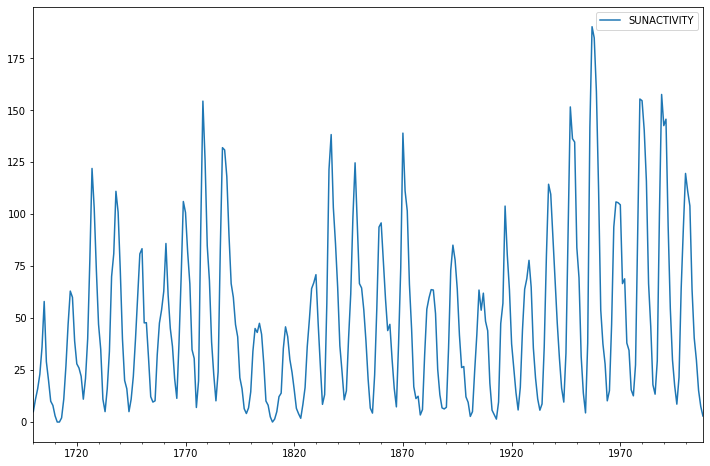

In [4]:
sunspots.plot(figsize=(12,8))

## ADF test

ADF test is used to determine the presence of unit root in the series, and hence helps in understand if the series is stationary or not. The null and alternate hypothesis of this test are:

Null Hypothesis: The series has a unit root (value of a =1).

Alternate Hypothesis: The series has no unit root.

If the null hypothesis in not rejected, the series is non-stationary.

A function is created to test carry out the ADF test on a time series.

In [5]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

## KPSS test

KPSS is another test for checking the stationarity of a time series. The null and alternate hypothesis for the KPSS test are opposite that of the ADF test.

Null Hypothesis: The process is trend stationary.

Alternate Hypothesis: The series has a unit root (series is not stationary).

A function is created to test carry out the KPSS test on a time series.

In [12]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags=None)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

The ADF tests gives the following results – test statistic, p value and the critical value at 1%, 5% , and 10% confidence intervals.

ADF test is now applied on the data.

In [13]:
adf_test(sunspots['SUNACTIVITY'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.837781
p-value                          0.053076
#Lags Used                       8.000000
Number of Observations Used    300.000000
Critical Value (1%)             -3.452337
Critical Value (5%)             -2.871223
Critical Value (10%)            -2.571929
dtype: float64


Critical value of p is assumed to be 0.05. Based upon the p-value of ADF test, the null hypothesis can not be rejected. Hence, the series is non-stationary.

The KPSS tests gives the following results – test statistic, p value and the critical value at 1%, 5% , and 10% confidence intervals.

KPSS test is now applied on the data.

In [14]:
kpss_test(sunspots['SUNACTIVITY'])

Results of KPSS Test:
Test Statistic            0.446646
p-value                   0.057049
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


Critical value of p is assumed to be 0.05. Based upon the p-value, the null hypothesis can not be rejected. Hence, the series is stationary as per the KPSS test. 

It is always better to apply both the tests, so that it can be ensured that the series is truly stationary. Possible outcomes of applying these stationary tests are as follows:

Case 1: Both tests conclude that the series is not stationary - The series is not stationary  
Case 2: Both tests conclude that the series is stationary - The series is stationary  
Case 3: KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend needs to be removed to make series strict stationary  
Case 4: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary  

Here, due to the differcne in the results from ADF test and KPSS test, it can be inferred that the series is trend stationary and not strict stationary. The series can be detrended by differencing or by model fitting.

## Detrending by Differencing

It is one of the simplest methods for detrending a time series. A new series is constructed where the value at the current time step is calculated as the difference between the original observation and the observation at the previous time step.

Differencing is applied on the data and the result is plotted.

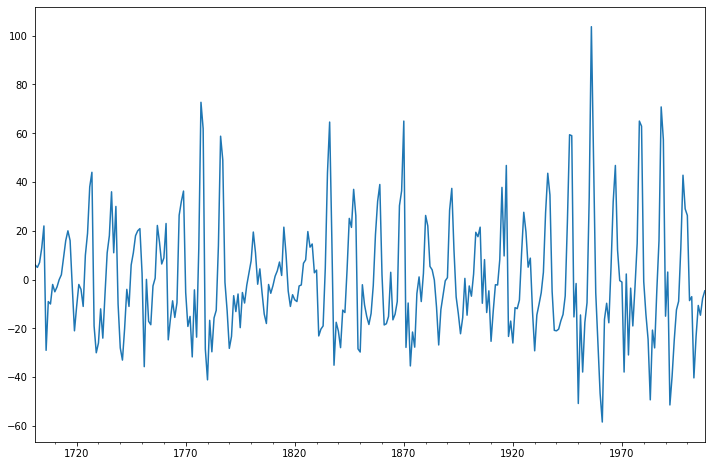

In [9]:
sunspots['SUNACTIVITY_diff'] = sunspots['SUNACTIVITY'] - sunspots['SUNACTIVITY'].shift(1)
sunspots['SUNACTIVITY_diff'].dropna().plot(figsize=(12,8))

ADF test is now applied on these detrended values and stationarity is checked.

In [10]:
adf_test(sunspots['SUNACTIVITY_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.486166e+01
p-value                        1.715552e-27
#Lags Used                     7.000000e+00
Number of Observations Used    3.000000e+02
Critical Value (1%)           -3.452337e+00
Critical Value (5%)           -2.871223e+00
Critical Value (10%)          -2.571929e+00
dtype: float64


Based upon the p-value of ADF test, the null hypothesis can be rejected. Hence, the series is strict stationary now.

KPSS test is now applied on these detrended values and stationarity is checked.

In [11]:
kpss_test(sunspots['SUNACTIVITY_diff'].dropna())

Results of KPSS Test:
Test Statistic            0.047507
p-value                   0.100000
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


D:\softwares\Anaconda\envs\fake\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Based upon the p-value of KPSS test, the null hypothesis can not be rejected. Hence, the series is stationary.

## Conclusion

Two tests for checking the stationarity of a time series are implemented, namely ADF test and KPSS test. Detrending is carried out by using differencing. Trend stationary time series is converted into strict stationary time series. Requisite forcastinig model can now be applied on a stationary time series data.